In [6]:
import torch
import copy
from torch.utils.data import DataLoader
import json
from datasets import load_dataset
from evaluate import load as load_metric
from transformers import GPTNeoXForCausalLM, AutoTokenizer
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from transformers.optimization import AdamW
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random
import time
import os
import sys
import pickle
from common_code import *

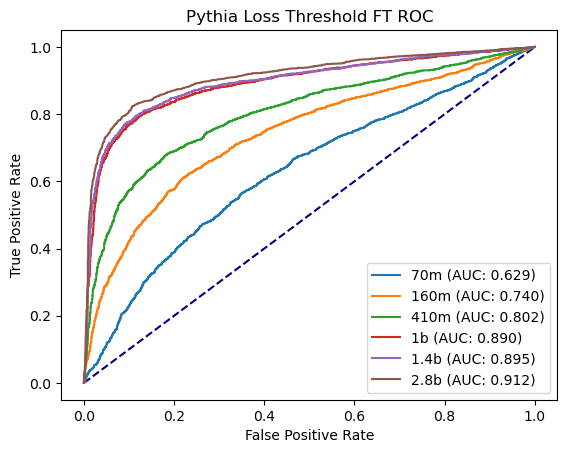

In [7]:
# Generate ROC curves in one plot
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for mod_size in ["70m","160m","410m","1b","1.4b","2.8b"]: 
    with open(f"loss_ratio/pythia-{mod_size}/loss.pickle","rb") as f:
        train_result_ft,val_result_ft = pickle.load(f)
    
    fpr, tpr, thresholds = roc_curve(torch.cat((torch.zeros_like(train_result_ft),torch.ones_like(val_result_ft))).flatten(),
                                 torch.cat((train_result_ft,val_result_ft)).flatten())
    
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{mod_size} (AUC: %0.3f)' % roc_auc)
plt.title(f"Pythia Loss Threshold FT ROC")
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

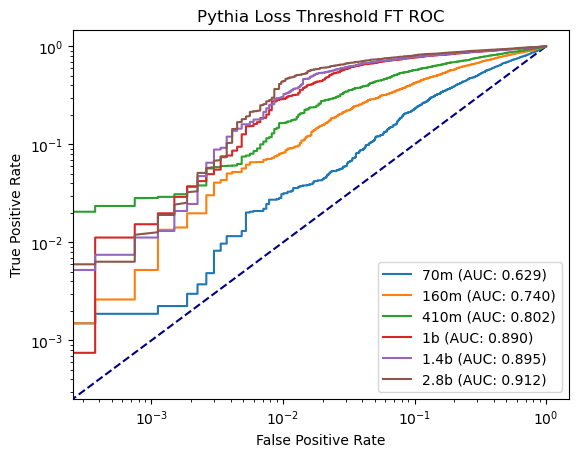

In [8]:
# Generate ROC curves in one plot
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for mod_size in ["70m","160m","410m","1b","1.4b","2.8b"]: 
    with open(f"loss_ratio/pythia-{mod_size}/loss.pickle","rb") as f:
        train_result_ft,val_result_ft = pickle.load(f)
    
    fpr, tpr, thresholds = roc_curve(torch.cat((torch.zeros_like(train_result_ft),torch.ones_like(val_result_ft))).flatten(),
                                 torch.cat((train_result_ft,val_result_ft)).flatten())
    
    roc_auc = auc(fpr, tpr)
    plt.loglog(fpr, tpr, label=f'{mod_size} (AUC: %0.3f)' % roc_auc)
plt.title(f"Pythia Loss Threshold FT ROC")
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

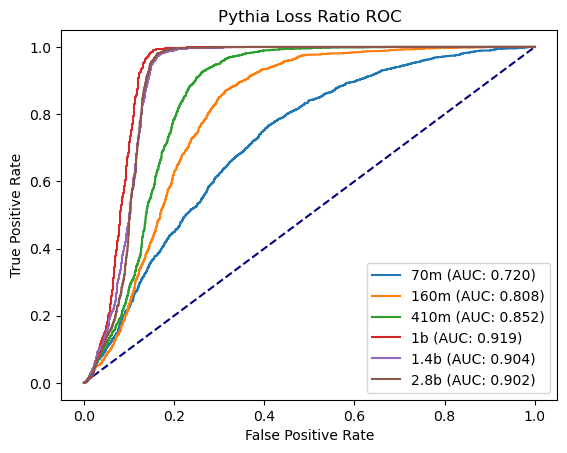

In [9]:
# Generate ROC curves in one plot
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for mod_size in ["70m","160m","410m","1b","1.4b","2.8b"]: 
    with open(f"loss_ratio/pythia-{mod_size}/ratios.pickle","rb") as f:
        train_ratios,val_ratios = pickle.load(f)

    fpr, tpr, thresholds = roc_curve(torch.cat((torch.zeros_like(train_ratios),torch.ones_like(val_ratios))).flatten(),
                                    torch.cat((train_ratios,val_ratios)).flatten())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{mod_size} (AUC: %0.3f)' % roc_auc)
plt.title(f"Pythia Loss Ratio ROC")
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

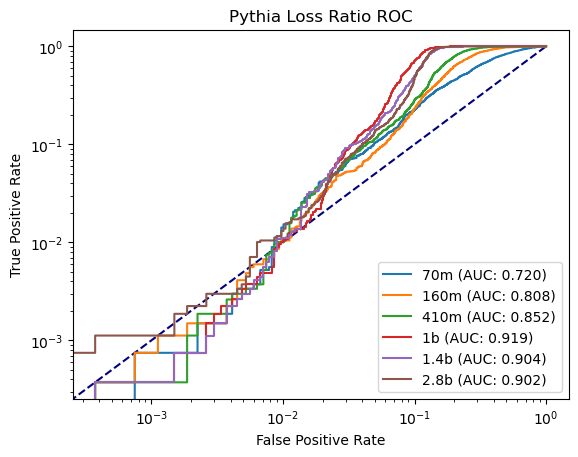

In [10]:
# Generate ROC curves in one plot
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for mod_size in ["70m","160m","410m","1b","1.4b","2.8b"]: 
    with open(f"loss_ratio/pythia-{mod_size}/ratios.pickle","rb") as f:
        train_ratios,val_ratios = pickle.load(f)

    fpr, tpr, thresholds = roc_curve(torch.cat((torch.zeros_like(train_ratios),torch.ones_like(val_ratios))).flatten(),
                                    torch.cat((train_ratios,val_ratios)).flatten())
    roc_auc = auc(fpr, tpr)
    plt.loglog(fpr, tpr, label=f'{mod_size} (AUC: %0.3f)' % roc_auc)
plt.title(f"Pythia Loss Ratio ROC")
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()